In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
if True:
    train = pd.read_csv('data/train.csv.zip')
    test = pd.read_csv('data/test.csv.zip')
    train.to_pickle('data/train_original.pkl')
    test.to_pickle('data/test_original.pkl')
else:
    train = pd.read_pickle('data/train_original.pkl')
    test = pd.read_pickle('data/test_original.pkl')

In [3]:
train.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [86]:
test.shape

(200000, 201)

### Check duplicate rows and columns

In [5]:
train.shape, train.drop_duplicates().shape

((200000, 202), (200000, 202))

In [7]:
train.T.drop_duplicates().T.shape

(200000, 202)

### Check column with single values

In [9]:
unique_cnts = train.nunique()
len(unique_cnts), (unique_cnts>1).sum()

(202, 202)

### Check correlations

In [21]:
(train.iloc[:10000,].corr('spearman')==1).sum().sum()

201

### Check unique values number: Find possible categorical columns or other mystery

In [12]:
unique_cnts = train.nunique()

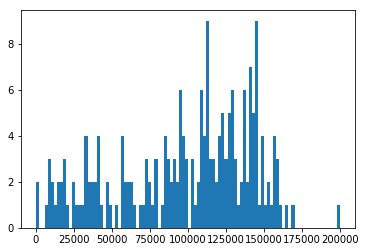

In [15]:
plt.hist(unique_cnts, bins=100); plt.show()

In [22]:
unique_cnts.min(), unique_cnts.loc[unique_cnts==unique_cnts.min()].index

(2, Index(['target'], dtype='object'))

In [30]:
train.info(memory_usage=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 202 entries, ID_code to var_199
dtypes: float64(200), int64(1), object(1)
memory usage: 308.2+ MB


In [34]:
special_cols = [col for col in train.columns if train[col].dtype != np.float64]
special_cols

['ID_code', 'target']

In [35]:
feature_cols = [col for col in train.columns if col not in special_cols]

In [36]:
trn_vc = pd.Series(np.concatenate(train[feature_cols].values)).value_counts()
trn_vc

 5.0215     1293
 5.0179     1286
 5.0209     1279
 5.0214     1268
 5.0188     1259
 5.0189     1256
 5.0202     1255
 5.0183     1254
 5.0211     1253
 5.0158     1252
 5.0208     1248
 5.0157     1245
 5.0203     1244
 5.0193     1238
 5.0174     1235
 5.0220     1235
 5.0221     1233
 5.0199     1232
 5.0195     1232
 5.0192     1230
 5.0204     1226
 5.0145     1224
 5.0207     1224
 5.0201     1223
 5.0190     1218
 5.0197     1217
 5.0219     1216
 5.0194     1215
 5.0184     1213
 5.0177     1213
            ... 
-41.0759       1
-31.8159       1
 41.1741       1
-38.1109       1
-38.3891       1
-35.0841       1
-38.0236       1
 38.1616       1
-44.8622       1
 49.8323       1
 49.9177       1
-28.3636       1
 41.3884       1
 41.3616       1
-32.7483       1
 44.5654       1
 41.3278       1
-31.9921       1
-36.6594       1
 39.3000       1
-33.1942       1
 38.0991       1
-30.5319       1
-30.1719       1
-38.1509       1
-25.5624       1
 44.4503       1
-27.4527      

In [37]:
tst_vc = pd.Series(np.concatenate(test[feature_cols].values)).value_counts()
tst_vc

 5.0215     1299
 5.0201     1288
 5.0197     1279
 5.0152     1278
 5.0184     1276
 5.0198     1272
 5.0209     1267
 5.0200     1264
 5.0179     1250
 5.0192     1248
 5.0212     1243
 5.0210     1241
 5.0188     1237
 5.0222     1237
 5.0203     1235
 5.0223     1231
 5.0185     1226
 5.0181     1226
 5.0158     1223
 5.0230     1216
 5.0194     1216
 5.0196     1215
 5.0168     1214
 5.0218     1212
 5.0165     1212
 5.0172     1212
 5.0207     1210
 5.0193     1209
 5.0208     1206
 5.0229     1205
            ... 
 35.0367       1
 35.7758       1
 46.4028       1
 46.0972       1
-31.1608       1
 53.0777       1
-34.5795       1
-23.9513       1
 45.8068       1
-41.3781       1
-23.1243       1
-29.7196       1
-24.0062       1
-26.2762       1
-33.7160       1
-31.4133       1
-38.9090       1
-30.8460       1
 39.1715       1
-44.3650       1
 53.5178       1
-33.7455       1
-24.7655       1
-28.2237       1
-38.9506       1
-35.1929       1
-23.9819       1
-33.5471      

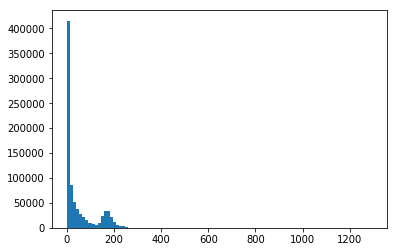

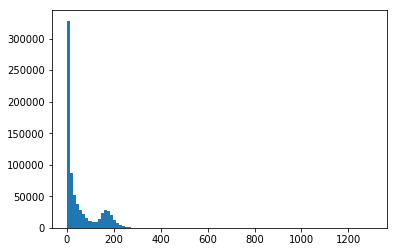

In [40]:
plt.hist(trn_vc.values, bins=100); plt.show()
plt.hist(tst_vc.values, bins=100); plt.show()

In [53]:
from tqdm import tqdm; tqdm.pandas()
pd.options.display.max_columns = 202
pd.options.display.max_rows = 300

In [79]:
def plot_target_val_loc(target_val):
    filt = train[feature_cols].progress_apply(lambda row: target_val in row.values ,axis=1)
    possible_cols = [c for c in feature_cols if target_val in train[c].values]
    
    fig = plt.figure(figsize=(20, 200))
    #fig.subplots_adjust(hspace=0.4, wspace=0.4)
    
    bitmap = train.loc[filt, possible_cols+['target']].values
    bitmap = (bitmap==target_val) | (bitmap==1)
    ax1 = fig.add_subplot(1, 2, 1)
    ax1.imshow(bitmap)

100%|███████████████████████████████████████████████████████████████████| 200000/200000 [00:02<00:00, 75443.23it/s]


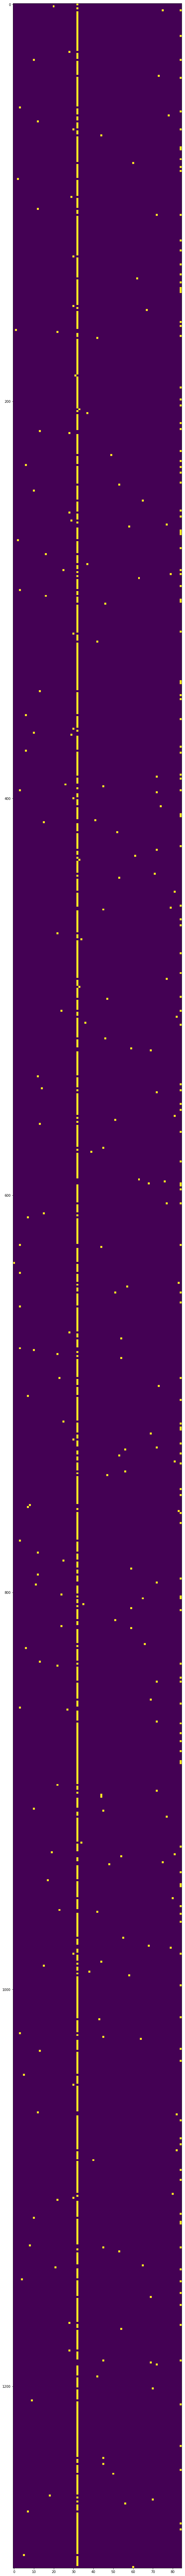

In [82]:
plot_target_val_loc(5.0215)

100%|███████████████████████████████████████████████████████████████████| 200000/200000 [00:02<00:00, 76849.18it/s]


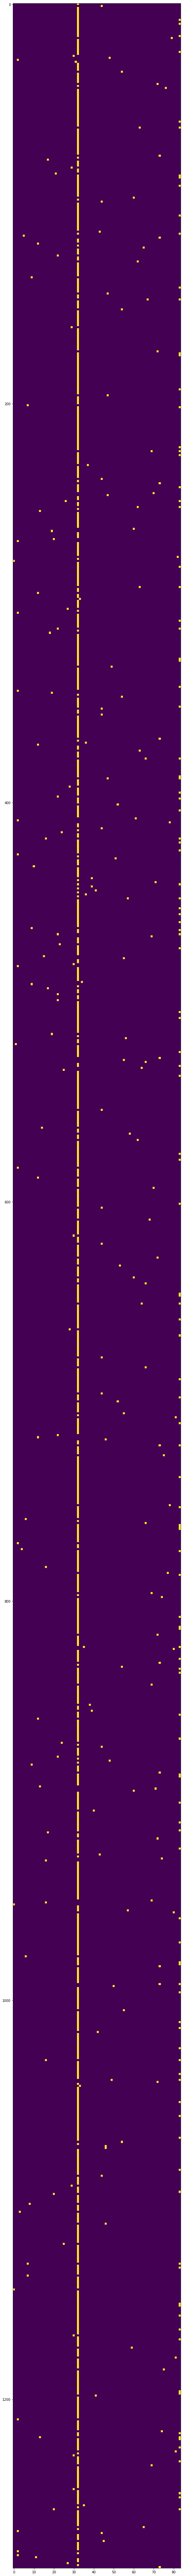

In [81]:
plot_target_val_loc(5.0179)

100%|███████████████████████████████████████████████████████████████████| 200000/200000 [00:02<00:00, 75685.90it/s]


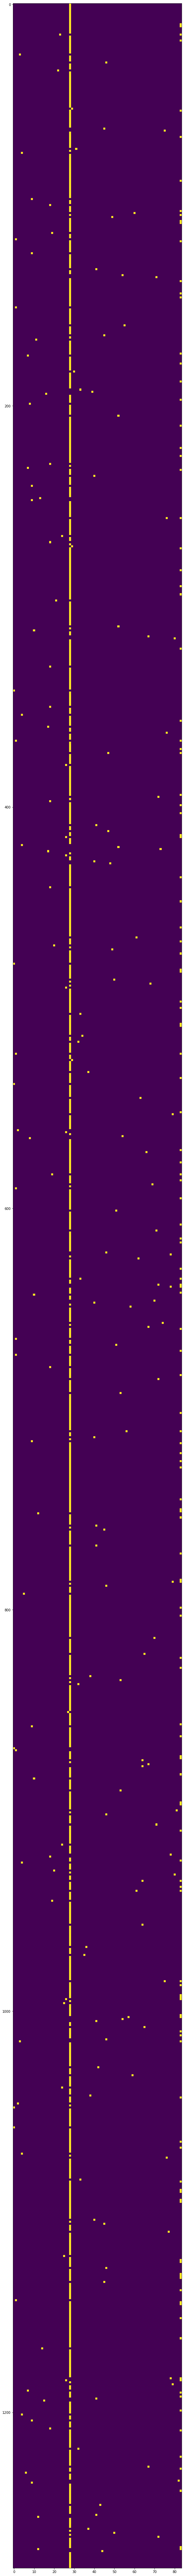

In [85]:
plot_target_val_loc(5.0209)

100%|███████████████████████████████████████████████████████████████████| 200000/200000 [00:02<00:00, 75642.96it/s]


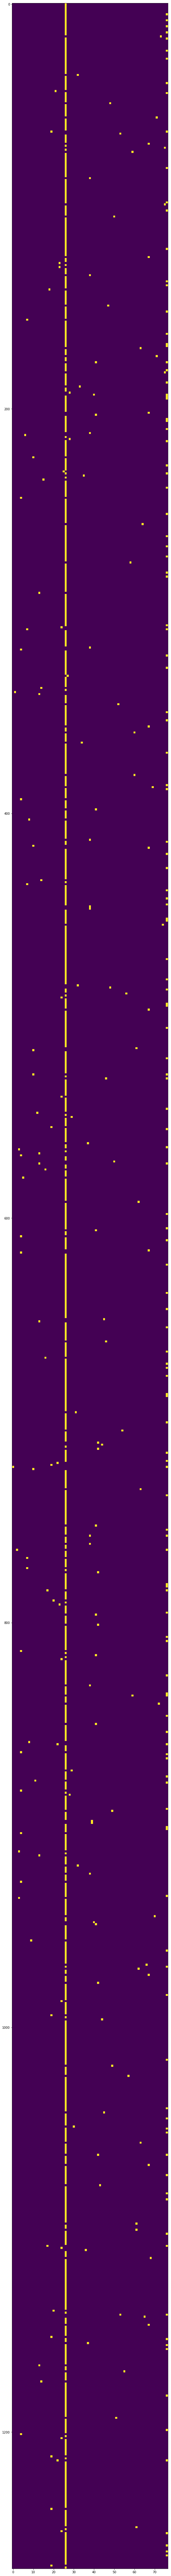

In [87]:
plot_target_val_loc(5.0214)

In [160]:
th = 610 #598
print((trn_vc>th).sum(), trn_vc[(trn_vc>th)].sum())
print((tst_vc>th).sum(), tst_vc[(tst_vc>th)].sum())

199 203032
200 203252


In [161]:
selected_vals = trn_vc[(trn_vc>th)].index.tolist()
res = pd.DataFrame(columns=['pop val', 'pop val col', 'pop val cnt'])

for i, val in tqdm(enumerate(selected_vals)):
    per_col_cnts = [(train[f]==val).sum() for f in feature_cols]
    best_col = feature_cols[per_col_cnts.index(max(per_col_cnts))]
    res.loc[i] = [val, best_col, trn_vc[val]]
    
res['pop val col'].nunique()

199it [01:27,  2.28it/s]


1

In [162]:
selected_vals = tst_vc[(tst_vc>th)].index.tolist()
res = pd.DataFrame(columns=['pop val', 'pop val col', 'pop val cnt'])

for i, val in tqdm(enumerate(selected_vals)):
    per_col_cnts = [(test[f]==val).sum() for f in feature_cols]
    best_col = feature_cols[per_col_cnts.index(max(per_col_cnts))]
    res.loc[i] = [val, best_col, tst_vc[val]]
    
res['pop val col'].nunique()

200it [01:28,  2.14it/s]


1

In [163]:
all_df = pd.concat([train[feature_cols], test[feature_cols]], axis=0).reset_index(drop=True)

In [164]:
all_vc = pd.Series(np.concatenate(all_df.values)).value_counts()
all_vc

 5.0215     2592
 5.0209     2546
 5.0179     2536
 5.0201     2511
 5.0188     2496
 5.0197     2496
 5.0184     2489
 5.0203     2479
 5.0192     2478
 5.0158     2475
 5.0200     2465
 5.0152     2463
 5.0214     2457
 5.0208     2454
 5.0212     2453
 5.0193     2447
 5.0198     2447
 5.0211     2445
 5.0189     2441
 5.0210     2436
 5.0185     2435
 5.0202     2435
 5.0207     2434
 5.0181     2433
 5.0194     2431
 5.0174     2431
 5.0199     2427
 5.0205     2410
 5.0195     2409
 5.0183     2405
 5.0218     2401
 5.0196     2399
 5.0222     2396
 5.0172     2396
 5.0227     2395
 5.0229     2389
 5.0157     2385
 5.0177     2380
 5.0186     2376
 5.0216     2375
 5.0187     2372
 5.0168     2368
 5.0221     2368
 5.0190     2368
 5.0175     2367
 5.0226     2365
 5.0191     2364
 5.0164     2359
 5.0149     2358
 5.0223     2355
 5.0154     2352
 5.0178     2352
 5.0213     2351
 5.0170     2348
 5.0165     2346
 5.0232     2346
 5.0151     2345
 5.0162     2336
 5.0228     23

In [172]:
th = 1000 #598
print((all_vc>th).sum(), all_vc[(all_vc>th)].sum())
trn_vc.index.isin(all_vc[(all_vc>th)].index).sum(), tst_vc.index.isin(all_vc[(all_vc>th)].index).sum()

230 439668


(230, 230)

In [173]:
selected_vals = all_vc[(all_vc>th)].index.tolist()
res = pd.DataFrame(columns=['pop val', 'pop val col', 'pop val cnt'])

for i, val in tqdm(enumerate(selected_vals)):
    per_col_cnts = [(all_df[f]==val).sum() for f in feature_cols]
    best_col = feature_cols[per_col_cnts.index(max(per_col_cnts))]
    res.loc[i] = [val, best_col, all_vc[val]]
    
res['pop val col'].nunique()

230it [03:11,  1.13it/s]


1